<a href="https://colab.research.google.com/github/Gressling/notebooks/blob/main/Design_space%2C_process_trade_offs%2C_predict_process_robustness_and_identify_operating_regimes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# title: Design space, process trade-offs, predict process robustness and identify operating regimes
# author: Gressling, T                               # license: MIT License
# code: github.com/gressling/notebooks               # activity: single example
# indices: [wikidata.Q21072556]

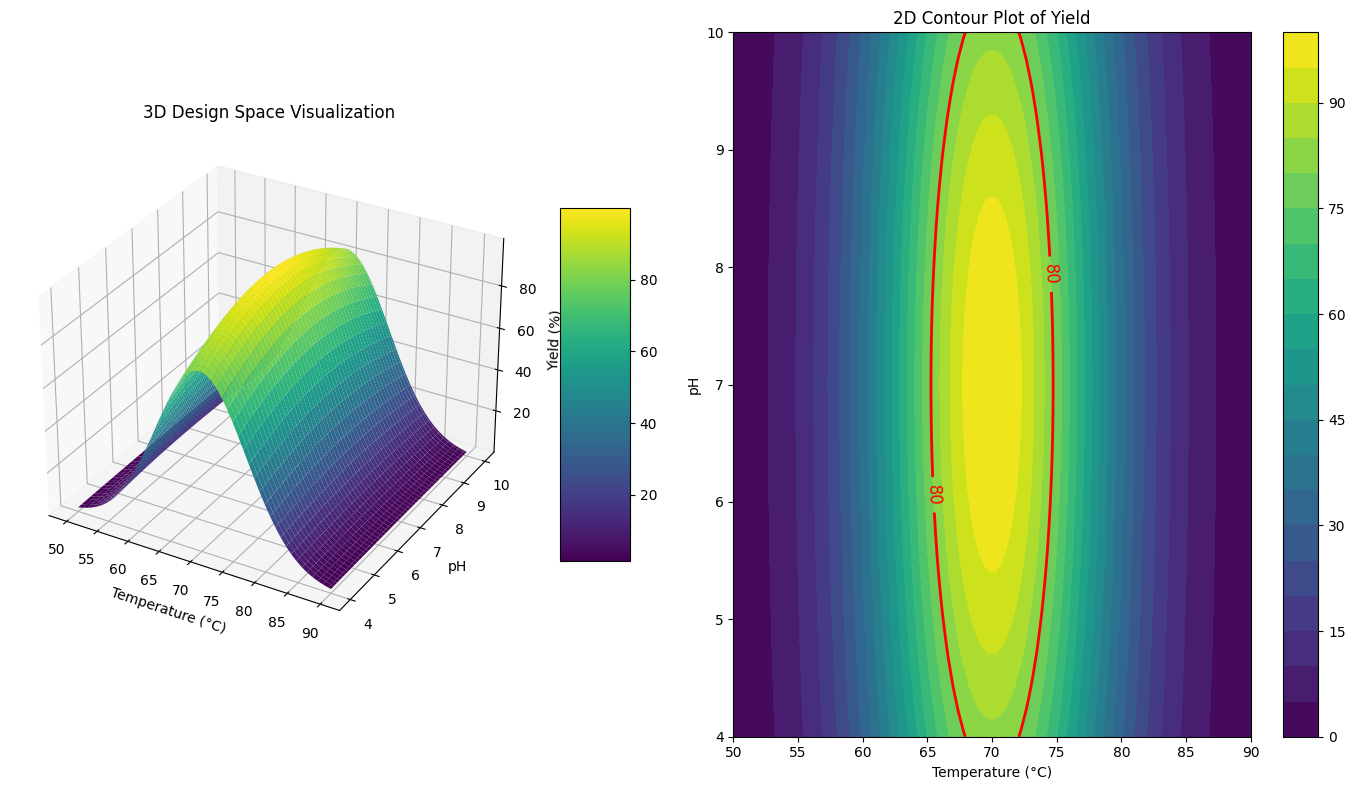

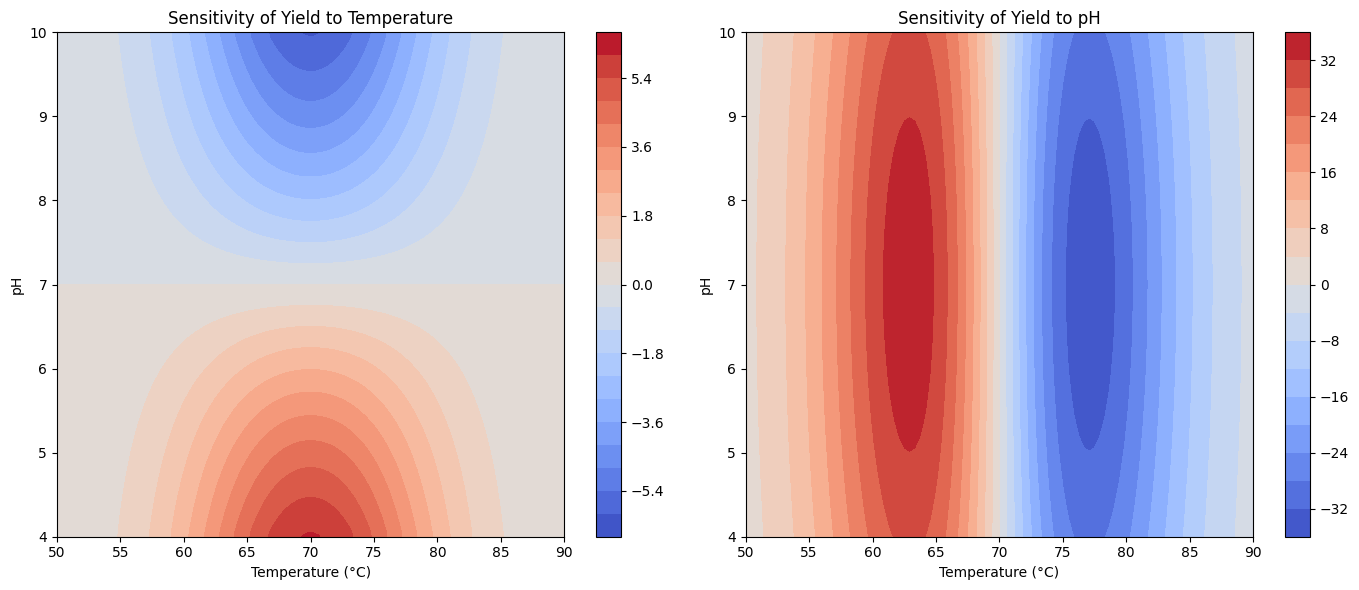

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the yield function
def yield_function(T, P):
    return 100 * np.exp(-0.01 * (T - 70)**2 - 0.02 * (P - 7)**2)

# Generate temperature and pH values
T = np.linspace(50, 90, 100)
P = np.linspace(4, 10, 100)
T, P = np.meshgrid(T, P)

# Calculate yield values
Y = yield_function(T, P)

# Create the 3D plot
fig = plt.figure(figsize=(14, 8))

# 3D Surface Plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(T, P, Y, cmap='viridis')
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('pH')
ax1.set_zlabel('Yield (%)')
ax1.set_title('3D Design Space Visualization')
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)

# 2D Contour Plot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(T, P, Y, levels=20, cmap='viridis')
plt.colorbar(contour, ax=ax2)
ax2.set_xlabel('Temperature (°C)')
ax2.set_ylabel('pH')
ax2.set_title('2D Contour Plot of Yield')

# Highlight regions of interest
threshold = 80
highlight = ax2.contour(T, P, Y, levels=[threshold], colors='red', linewidths=2)
ax2.clabel(highlight, fmt='%2.0f', colors='red', fontsize=12)

plt.tight_layout()
plt.show()

# Sensitivity Analysis
delta_T = 0.1
delta_P = 0.1
sensitivity_T = np.gradient(Y, delta_T, axis=0)
sensitivity_P = np.gradient(Y, delta_P, axis=1)

# Plot Sensitivity Analysis
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Sensitivity with respect to Temperature
contour_T = ax[0].contourf(T, P, sensitivity_T, levels=20, cmap='coolwarm')
plt.colorbar(contour_T, ax=ax[0])
ax[0].set_xlabel('Temperature (°C)')
ax[0].set_ylabel('pH')
ax[0].set_title('Sensitivity of Yield to Temperature')

# Sensitivity with respect to pH
contour_P = ax[1].contourf(T, P, sensitivity_P, levels=20, cmap='coolwarm')
plt.colorbar(contour_P, ax=ax[1])
ax[1].set_xlabel('Temperature (°C)')
ax[1].set_ylabel('pH')
ax[1].set_title('Sensitivity of Yield to pH')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


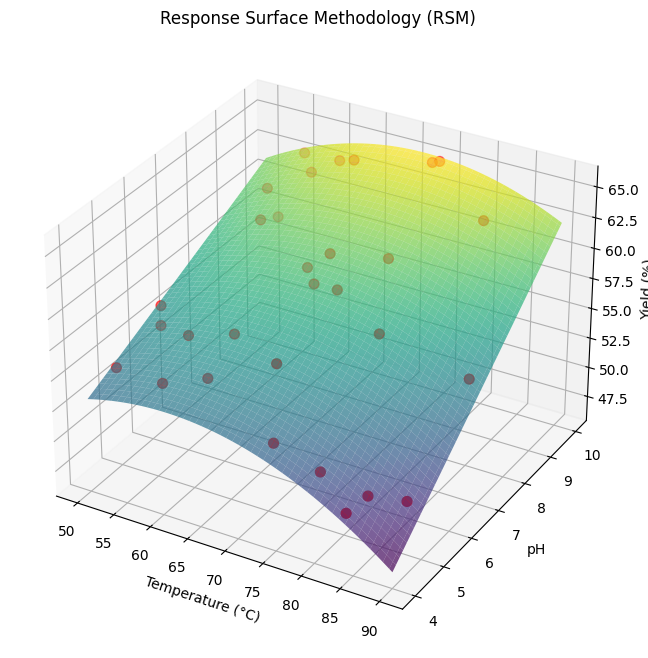

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data
np.random.seed(42)
T = np.random.uniform(50, 90, 30)
P = np.random.uniform(4, 10, 30)
# Coefficients for the quadratic model
beta_0 = 10
beta_1 = 1.2
beta_2 = 0.8
beta_11 = -0.01
beta_22 = -0.02
beta_12 = 0.02
epsilon = np.random.normal(0, 1, 30)
# Response variable
Y = (beta_0 + beta_1*T + beta_2*P + beta_11*T**2 + beta_22*P**2 + beta_12*T*P + epsilon)

# Create DataFrame
data = pd.DataFrame({'Temperature': T, 'pH': P, 'Yield': Y})

# Fit a quadratic model using PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X = poly.fit_transform(data[['Temperature', 'pH']])
model = LinearRegression().fit(X, data['Yield'])

# Generate grid for visualization
T_grid, P_grid = np.meshgrid(np.linspace(50, 90, 100), np.linspace(4, 10, 100))
X_grid = poly.transform(np.c_[T_grid.ravel(), P_grid.ravel()])
Y_grid = model.predict(X_grid).reshape(T_grid.shape)

# Create 3D surface plot
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T_grid, P_grid, Y_grid, cmap='viridis', alpha=0.7)

# Scatter plot of the original data points
ax.scatter(data['Temperature'], data['pH'], data['Yield'], color='r', s=50)

# Labels and title
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('pH')
ax.set_zlabel('Yield (%)')
ax.set_title('Response Surface Methodology (RSM)')

plt.show()
